# Credit Card Default Prediction

The goal of this project is to explore different machine learning classifiers to predict whether a customer is going to default his card payment or not next month.

Dataset link : http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Attribute Information:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
# Importing useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, make_scorer, recall_score
from sklearn.model_selection import GridSearchCV


# Classifers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.naive_bayes import GaussianNB

## Load Data

In [2]:
# Reading data
try :
    df = pd.read_csv('UCI_Credit_Card.csv')

except Exception as e:
    print(e)
    print('Failed to read credit card dataset.')        

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape

(30000, 25)

There are 30000 observations and 25 variables. 

In [5]:
# dropping id column as not needed in our analysis
df.drop('ID', axis = 1, inplace = True)

# Renaming columns to some understandable format
df.rename(columns={'default.payment.next.month': 'Default',
                   'PAY_0' : 'PAY_1'}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

## Checking null or missing values columns

In [6]:
## Finding counts and percentages of null values 

null_columns = df.columns[df.isnull().any()]
null_count = df[null_columns].isnull().sum()
null_pct = (null_count/len(df)) * 100

null_data = pd.DataFrame({'Count' : null_count, 'Percentage' : null_pct})
print(null_data)

Empty DataFrame
Columns: [Count, Percentage]
Index: []


No missing values in entire dataset.

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Cleaning

In [8]:
# Check unique values of categorical features

categorical_col = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in categorical_col :
    print(col)
    print(df[col].unique())

SEX
[2 1]
EDUCATION
[2 1 3 5 4 6 0]
MARRIAGE
[1 2 3 0]


As per the data dictionary, education level is (1 to 4), so here we will assume level 0, 5 and 6 as level 4 itself.
Same for Marriage, level 0(as not mentioned in dictionary) will be assumed as level-3(Others).

In [9]:
# Combining unknown levels of Education and Marriage column to Others category

df['EDUCATION'] = np.where((df['EDUCATION'] == 0)|(df['EDUCATION'] == 5)|(df['EDUCATION'] == 6), 4, df['EDUCATION'])

df['MARRIAGE'] = np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

print('Education : \n{}'.format(df['EDUCATION'].value_counts()))
print('\nMARRIAGE : \n{}'.format(df['MARRIAGE'].value_counts()))
print('\nSEX :\n{}'.format(df['SEX'].value_counts()))

Education : 
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

MARRIAGE : 
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

SEX :
2    18112
1    11888
Name: SEX, dtype: int64


# Exploring Data

### 1. Categorical features

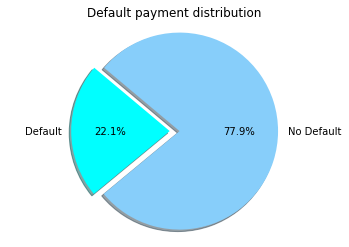

In [10]:
# Data to plot
labels = 'Default', 'No Default'
sizes = [df['Default'].value_counts()[1], df['Default'].value_counts()[0]]
colors = ['cyan','lightskyblue' ]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Default payment distribution')
plt.show()

The data is imbalanced. Out of 30,000 clients, 22% of customers likely to default.

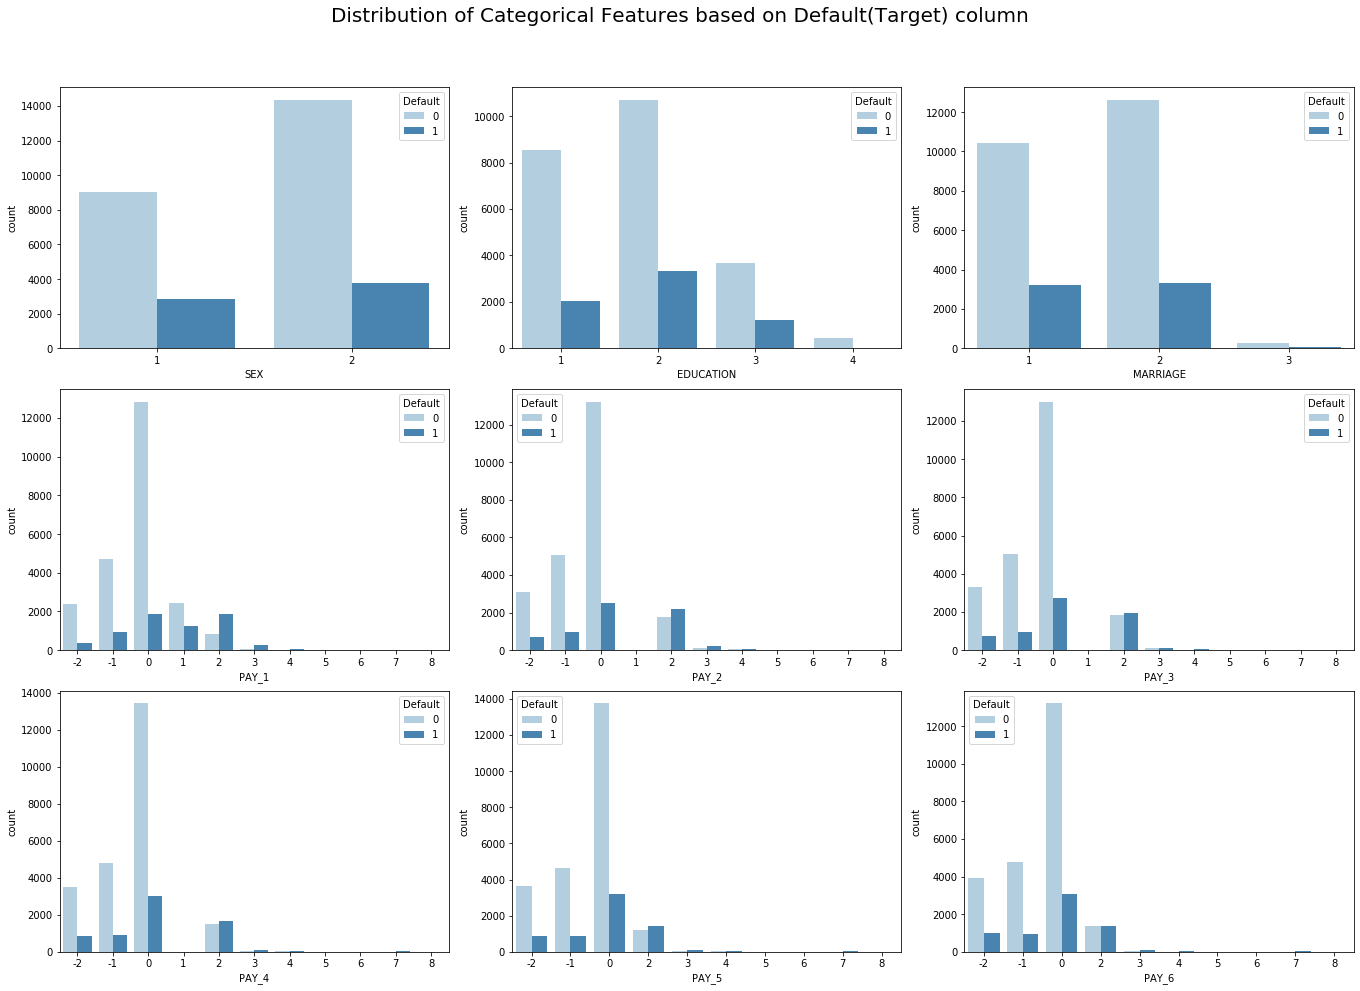

In [11]:
# Get default and no default distributions based on Gender / Education / Marital status of clients
#   SEX: Gender (1=male, 2=female)
#   EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
#   MARRIAGE: Marital status (1=married, 2=single, 3=others)

categorical_features = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']].copy()

f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle('Distribution of Categorical Features based on Default(Target) column',size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.countplot(x='SEX', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[0,0])
ax2 = sns.countplot(x='EDUCATION', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[0,1])
ax3 = sns.countplot(x='MARRIAGE', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[0,2])
ax4 = sns.countplot(x='PAY_1', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[1,0])
ax5 = sns.countplot(x='PAY_2', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[1,1])
ax6 = sns.countplot(x='PAY_3', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[1,2])
ax7 = sns.countplot(x='PAY_4', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[2,0])
ax8 = sns.countplot(x='PAY_5', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[2,1])
ax9 = sns.countplot(x='PAY_6', hue = 'Default', data=categorical_features, palette='Blues', ax=axes[2,2])
f.tight_layout()  
f.subplots_adjust(top=0.9)

1. Female tend to default more compared to men
2. Frequency of defaulters is more among University students.

In [12]:
male_pct = 100 * df.groupby('SEX')['Default'].value_counts()[1] / len(df)

female_pct = 100 * df.groupby('SEX')['Default'].value_counts()[2] / len(df)
print(f'Male : {round(male_pct)} \n Female : {round(female_pct)}')

Male : Default
0    30.0
1    10.0
Name: Default, dtype: float64 
 Female : Default
0    48.0
1    13.0
Name: Default, dtype: float64


### 2. Continuous Variables

In [15]:
numeric_var = df[['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
numeric_var.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


Text(0.5, 1.0, 'Limit Balance Histogram based on Target variable')

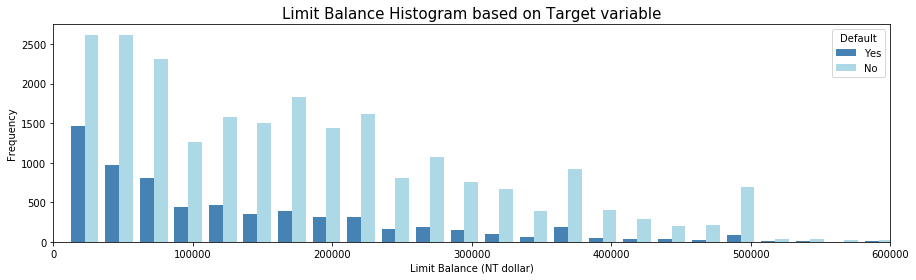

In [16]:
# Credit Limit Balance

limit_default = df[df['Default'] == 1]['LIMIT_BAL']
limit_nodefault = df[df['Default'] == 0]['LIMIT_BAL']

plt.figure( figsize =(15 ,4))
plt.hist([limit_default, limit_nodefault], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Limit Balance Histogram based on Target variable', SIZE=15)

Frequency of default is more for customers having a card with lower credit limit.
Customers having higher limit credit card default their payment less.

Text(0.5, 1.0, 'Histogram of Age based on Target variable')

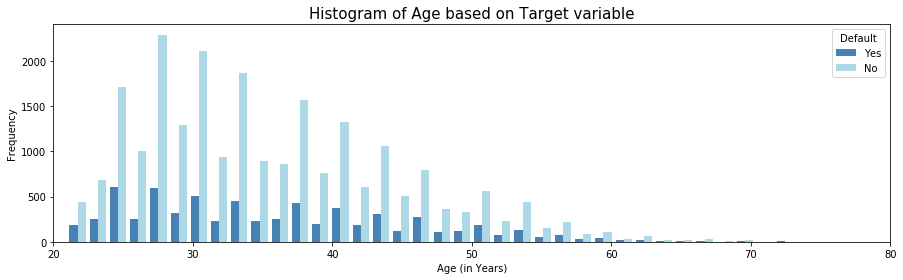

In [17]:
# Age Distribution

age_default = df[df['Default'] == 1]['AGE']
age_nodefault = df[df['Default'] == 0]['AGE']

plt.figure( figsize =(15 ,4))
plt.hist([age_default, age_nodefault], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([20,80])
plt.legend(['Yes', 'No'], title = 'Default')
plt.xlabel('Age (in Years)')
plt.ylabel('Frequency')
plt.title('Histogram of Age based on Target variable', SIZE=15)

Customers of age group 20~35 tend to default more.

# Feature Selection

### Correlation Matrix 

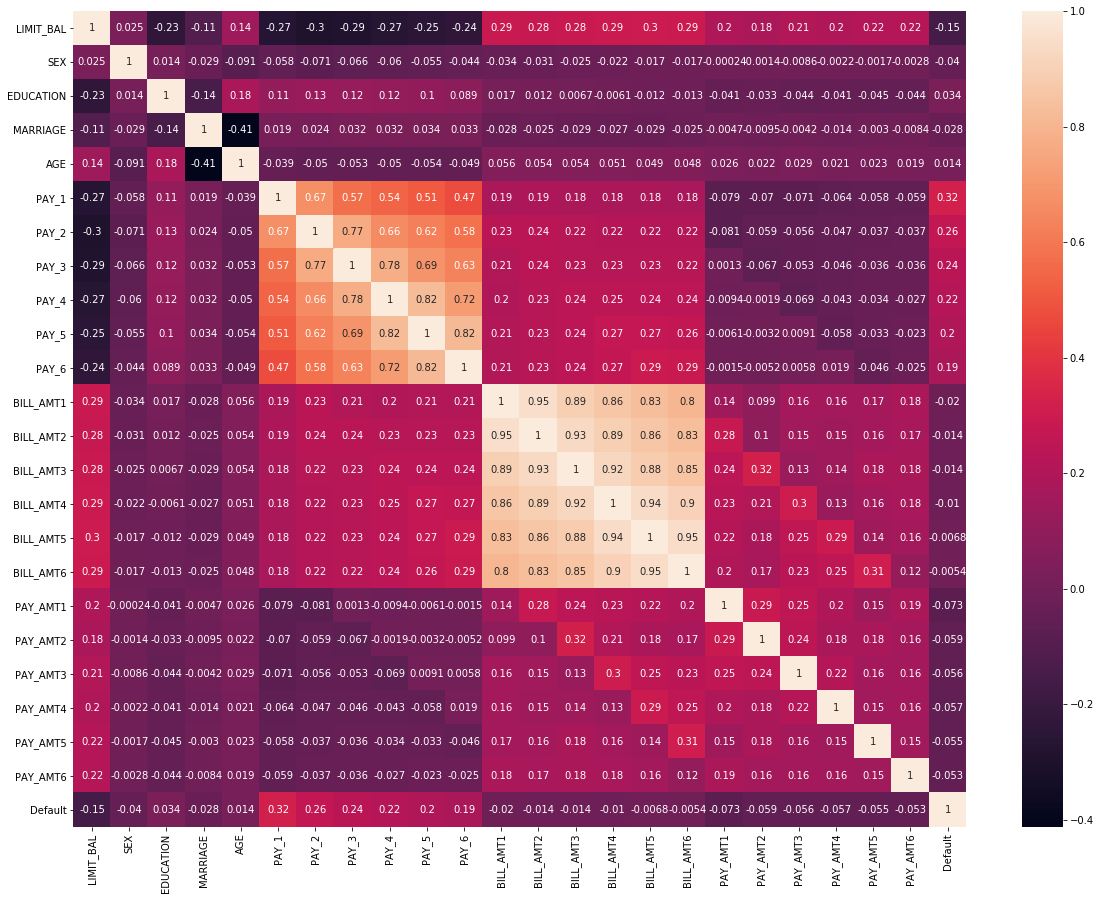

In [18]:
# Correlation between all variables 

corr = df.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot = True)

1. The only variable with a notable correlation with default is payment status. The last month’s (September) payment status has a Pearson correlation coefficient of 0.32 with default. The other months' correlations are slightly lower. This is not srprising, since a customer with atleast a month or more delay of payments is more likely to not be able to pay their bills in the upcoming month.
2. The next highest correlation with default occurs with balance limit at -0.15, which itself was somewhat negatively correlated with payment statuses. These measures indicate that customers with lower balance limits have more delays in payments and are more likely to default.
3. Bill amounts and payment amounts are also modedrately positively correlated with balance limit, but that is to be expected, since customers with higher credit limit are more liklely to spend more.

### Recursive Feature Selection 

In [19]:
X = df.iloc[:,:-1].values
Y = df['Default'].values

# Feature extraction
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, Y)
print(f'Num Features: {rfe.n_features_}')
print(f'Selected Features: {rfe.support_}')
print(f'Feature Ranking: {rfe.ranking_}')

# select columns only with imp features 
features = df.columns[ : -1]
imp_features = features[rfe.support_]

df_features = df[imp_features]
df_features.head()

Num Features: 10
Selected Features: [ True False False False  True  True False False False False False  True
  True  True  True  True  True  True False False False False False]
Feature Ranking: [ 1 14 11 13  1  1  5  8 10  9 12  1  1  1  1  1  1  1  2  3  6  7  4]


,LIMIT_BAL,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1
0,20000.0,24,2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0
2,90000.0,34,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0
3,50000.0,37,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0
4,50000.0,57,-1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0


# Training & Testing various Models

Since the data is slightly imbalanced, accuracy will not be a good metric for evaluating model performance.  
Hence, for evaluating my models, I have chosen precision, recall and AUC as the evaluation metric.

In [20]:
# Separating X and Y values to train and test our models  
# 80% training and 20% Testing

#X = df.iloc[:,:-1].values
X = df_features.values
Y = df['Default'].values

# Splitting into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
print(f'Training features shape: {X_train.shape}')
print(f'Training Labels shape: {Y_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Testing labels shape: {Y_test.shape}')

# Let's define an empty dataframe to store the results
result_metrics = pd.DataFrame()

Training features shape: (24000, 10)
Training Labels shape: (24000,)
Testing features shape: (6000, 10)
Testing labels shape: (6000,)


In [22]:
def get_model_performance(x_train,x_test,y_train,y_test, model, model_name) :
    
    #accuracy = precision = recall = f1_score = []
    
    model.fit(x_train, y_train)
    prediction =  model.predict(x_test)
    accuracy   =  round(np.mean(y_test == prediction), 3)
    precision  =  round(metrics.precision_recall_fscore_support(Y_test, prediction)[0][1], 3)
    recall     =  round(metrics.precision_recall_fscore_support(Y_test, prediction)[1][1] , 3)
    #f1_score   =  round(metrics.precision_recall_fscore_support(Y_test, prediction)[2][1] , 3)
    
    cf = confusion_matrix(y_test, prediction)
    
    model_df = pd.DataFrame([[model_name, accuracy, precision, recall]], 
                      columns = ['Model', 'Accuracy','Precision','Recall'])
            
    return cf, model_df

In [23]:
# Grid search model with specified parameters

def get_tuned_parameters(param_grid, clf) :
    grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring = make_scorer(recall_score))

    grid_search.fit(X_train_scaled, Y_train)
    grid_search.best_params_

    print(f'Tuned {clf} Parameters: {grid_search.best_params_}')
    print(f'Tuned {clf} Estimators: {grid_search.best_estimator_}')

### 1. Logistic Regression

The below code is to find the best paramters for Logistic Regression model. 

In [24]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 10),
    'class_weight': [
            {0: 1, 1: i} for i in np.linspace(0.25, 2.5, 5)]
}


LR = LogisticRegression(random_state = 10, solver = 'liblinear')
get_tuned_parameters(param_grid, LR)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   17.5s


Tuned LogisticRegression(random_state=10, solver='liblinear') Parameters: {'C': 0.0001, 'class_weight': {0: 1, 1: 2.5}, 'penalty': 'l2'}
Tuned LogisticRegression(random_state=10, solver='liblinear') Estimators: LogisticRegression(C=0.0001, class_weight={0: 1, 1: 2.5}, random_state=10,
                   solver='liblinear')


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.3s finished


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.781,0.479,0.549


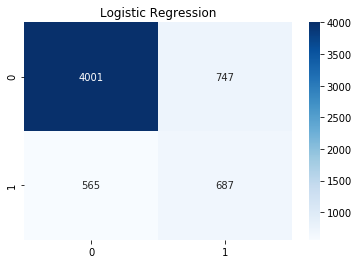

In [25]:
# Model with tuned parameters
LR = LogisticRegression(C=0.0001, class_weight={0: 1, 1: 2.5}, random_state=10,
                   solver='liblinear')

logit_cf, logit_df = get_model_performance(X_train_scaled, X_test_scaled,
                                          Y_train,Y_test,
                                          LR, 'Logistic Regression')

sns.heatmap(logit_cf, annot = True, cmap = 'Blues', fmt = 'd').set_title('Logistic Regression')
logit_df 

### 2. K-Nearest Neighbors 

In [26]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_neighbors': range(3, 22, 2),
    'p' : [1,2]
}

knn = KNeighborsClassifier()

get_tuned_parameters(param_grid, knn)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s


Tuned KNeighborsClassifier() Parameters: {'n_neighbors': 3, 'p': 1}
Tuned KNeighborsClassifier() Estimators: KNeighborsClassifier(n_neighbors=3, p=1)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.0s finished


,Model,Accuracy,Precision,Recall
0,kNN,0.78,0.468,0.379


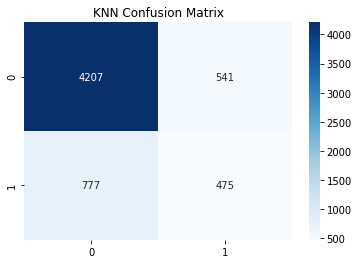

In [27]:
# Evaluating model using the best estimators chosen from above.
knn = KNeighborsClassifier(n_neighbors=3, p=1)

knn_cf, knn_df = get_model_performance(X_train_scaled, X_test_scaled,
                                          Y_train,Y_test,
                                          knn, 'kNN')

sns.heatmap(knn_cf, annot = True, cmap = 'Blues', fmt = 'd').set_title('KNN Confusion Matrix')
knn_df

### 3. Random Forest

##### Hyper Parameter Tuning

The below code will take around 40 min in selecting the best estimators for Random forest model.

In [28]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6,7,8],
    'max_features': [3,5,7,8],
    'n_estimators': [50, 100, 150],
    'class_weight': [
            {0: 1, 1: i} for i in np.linspace(0.25, 2.5, 5)]
}


rf = RandomForestClassifier()

get_tuned_parameters(param_grid, rf)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 41.7min finished


Tuned RandomForestClassifier() Parameters: {'bootstrap': True, 'class_weight': {0: 1, 1: 2.5}, 'max_depth': 7, 'max_features': 5, 'n_estimators': 150}
Tuned RandomForestClassifier() Estimators: RandomForestClassifier(class_weight={0: 1, 1: 2.5}, max_depth=7, max_features=5,
                       n_estimators=150)


,Model,Accuracy,Precision,Recall
0,Random Forest,0.82,0.577,0.518


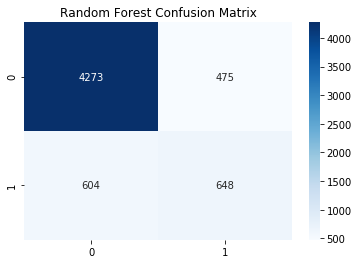

In [29]:
# Evaluating model using the best estimators chosen from above.
rf = RandomForestClassifier(class_weight={0: 1, 1: 2.5}, max_depth=7, max_features=5,
                       n_estimators=150)

rf_tuned_cf, rf_tuned_df = get_model_performance(X_train_scaled, X_test_scaled,
                                          Y_train,Y_test,
                                          rf, 'Random Forest')

sns.heatmap(rf_tuned_cf, annot = True, cmap = 'Blues', fmt = 'd').set_title('Random Forest Confusion Matrix')
rf_tuned_df

### 4. Support Vector Machine

The below code will take around 18 min in selecting the best estimators for SVM model.

In [30]:
# Create the parameter grid
param_grid = {
    'kernel' : ['linear', 'rbf'],
    'C': [0.01, 0.1, 1],
    'class_weight': [
            {0: 1, 1: i} for i in np.linspace(0.25, 2.5, 5)]
}

svc = svm.SVC()
get_tuned_parameters(param_grid, svc)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
C:\Users\Home\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 18.6min finished


Tuned SVC() Parameters: {'C': 0.01, 'class_weight': {0: 1, 1: 2.5}, 'kernel': 'linear'}
Tuned SVC() Estimators: SVC(C=0.01, class_weight={0: 1, 1: 2.5}, kernel='linear')


,Model,Accuracy,Precision,Recall
0,SVM,0.796,0.511,0.526


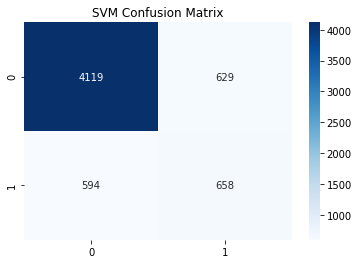

In [31]:
svc = svm.SVC(kernel = 'linear', C=0.01, class_weight={0: 1, 1: 2.5}, probability=True)

svc_cf, svc_df = get_model_performance(X_train_scaled, X_test_scaled,
                                          Y_train,Y_test,
                                          svc, 'SVM')

sns.heatmap(svc_cf, annot = True, cmap = 'Blues', fmt = 'd').set_title('SVM Confusion Matrix')
svc_df

### 5. Naive Bayesian

,Model,Accuracy,Precision,Recall
0,Gaussian Naive Bayesian,0.818,0.581,0.449


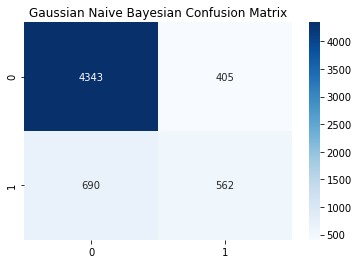

In [32]:
gnb = GaussianNB()
gnb_cf, gnb_df = get_model_performance(X_train_scaled, X_test_scaled,
                                          Y_train,Y_test,
                                          gnb, 'Gaussian Naive Bayesian')

sns.heatmap(gnb_cf, annot = True, cmap = 'Blues', fmt = 'd').set_title('Gaussian Naive Bayesian Confusion Matrix')
gnb_df

## ROC Curve for different models

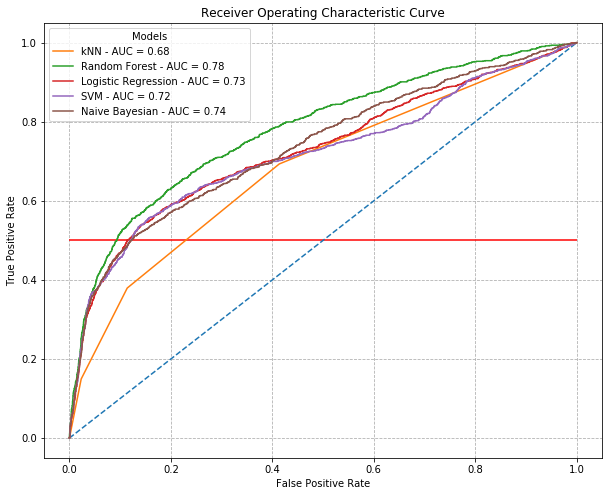

In [33]:
def evaluation_metrics_ROC(clf, x_test, y_test) :
    roc_metric = []
    probs = clf.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
        
    return fpr, tpr, roc_auc

knn_fpr, knn_tpr, knn_auc    =  evaluation_metrics_ROC(knn,X_test_scaled, Y_test)
rf_fpr, rf_tpr, rf_auc       =  evaluation_metrics_ROC(rf,X_test_scaled, Y_test)
lr_fpr, lr_tpr, lr_auc       =  evaluation_metrics_ROC(LR,X_test_scaled, Y_test)
svc_fpr, svc_tpr, svc_auc    =  evaluation_metrics_ROC(svc,X_test_scaled, Y_test)
gnb_fpr, gnb_tpr, gnb_auc    =  evaluation_metrics_ROC(gnb,X_test_scaled, Y_test)

# Plot ROC for different classifiers
plt.figure(figsize = (10,8))
ax = plt.gca()
plt.plot([0, 1], [0, 1], '--')
plt.plot(knn_fpr, knn_tpr, linestyle = 'solid', label = f'kNN - AUC = {knn_auc:.2f}')
plt.plot(rf_fpr, rf_tpr, linestyle = 'solid',   label = f'Random Forest - AUC = {rf_auc:.2f}')
plt.plot(lr_fpr, lr_tpr, linestyle = 'solid',   label = f'Logistic Regression - AUC = {lr_auc:.2f}')
plt.plot(svc_fpr, svc_tpr, linestyle = 'solid', label = f'SVM - AUC = {svc_auc:.2f}')
plt.plot(gnb_fpr, gnb_tpr, linestyle = 'solid', label = f'Naive Bayesian - AUC = {gnb_auc:.2f}')
plt.legend(loc= 'best', title = 'Models')
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--')
plt.hlines(y=0.5, xmin=0, xmax=1,color='red')
plt.show()

From the above curve, Random Forest classifier stands out and has a better performance out of 5 models, followed by Naive Bayesian and Logistic regression and then SVM. kNN gave a very low performance.

### Final Results

In [34]:
knn_df['AUC'] = knn_auc
rf_tuned_df['AUC'] = rf_auc
logit_df['AUC'] = lr_auc
svc_df['AUC'] = svc_auc
gnb_df['AUC'] = gnb_auc

# Final df with all metrices
#final_metrics = [knn_df, rf_df, logit_df, lsvm_df, gnb_df]
final_metrics = [logit_df,knn_df, rf_tuned_df, svc_df, gnb_df]
result_df = pd.concat(final_metrics)
result_df = result_df.reset_index().drop('index', axis =1)
result_df.to_csv('Final_Results.csv')
result_df

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.781,0.479,0.549,0.728752
1,kNN,0.780,0.468,0.379,0.682906
2,Random Forest,0.820,0.577,0.518,0.779620
3,SVM,0.796,0.511,0.526,0.718720
4,Gaussian Naive Bayesian,0.818,0.581,0.449,0.736902
